# Import important dependicies

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [173]:
df = pd.read_csv("datasets/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Veri Ön İşleme:
* Eksik verileri nasıl yöneteceksiniz? Hangi stratejileri kullanarak eksik verileri doldurursunuz?
* Veri setinde hangi kategorik ve sayısal değişkenler bulunuyor?
### Veri Analizi:
* Cinsiyet ve yaş değişkenlerini kullanarak, hayatta kalma oranlarını nasıl karşılaştırırsınız? Hayatta kalma oranları cinsiyete ve yaşa göre nasıl değişiyor?
* Cinsiyet ve yaş değişkenlerinin hayatta kalma üzerindeki etkilerini analiz edin. Yaş grubuna göre hayatta kalma oranlarını nasıl gruplandırırsınız?
### Modelleme:
* Basit bir model (örneğin, lojistik regresyon) kullanarak hayatta kalma tahmini yapın. Modelinizin doğruluk oranını değerlendirin.
* Modelin başarı oranını değerlendirin ve cinsiyet ile yaşın bu model üzerindeki etkilerini tartışın.
### Ekstra Not:

* Analizinizin sonucunda hangi değişkenlerin hayatta kalma oranları üzerinde en fazla etkiye sahip olduğunu belirleyin ve nedenini açıklayın.
* Veri setimiz burda kaggledan takip ettim sizi bitirdiginizde tekrardan iletişime geceriz

In [174]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [175]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [176]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* So, 891 entries in our dataset and we quickly realize that we have some missing values in Age, and Cabin and only small fraction of Embarked columns/features, we will handle this later.

* So, because there is a huge amount of Cabin column is missing, I gave a decision to drop since it will be too hard to input them even though it might be a pretty good indication of Survived or not.

## Quick categorical columns exploration

In [178]:
def value_counts_with_percentage(df, column):
    """
    This function takes a DataFrame and a column name (categorical variable),
    and returns a DataFrame with counts and percentages of each unique value.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The name of the categorical column.
    
    Returns:
    pd.DataFrame: A DataFrame with counts and percentages of each unique value.
    """
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    
    # Combine counts and percentages into a DataFrame
    result = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    
    # Prettify the result
    result.index.name = column
    result.reset_index(inplace=True)
    result['Percentage'] = result['Percentage'].map('{:.2f}%'.format)
    
    return result

result_sex = value_counts_with_percentage(df, 'Sex')
result_Embarked = value_counts_with_percentage(df, 'Embarked')
result_Pclass = value_counts_with_percentage(df, 'Pclass')
result_Survived = value_counts_with_percentage(df, 'Survived')

# Display the results on top of each other
display(result_sex)
display(result_Embarked)
display(result_Pclass)
display(result_Survived)

,Sex,Count,Percentage
0,male,577,64.76%
1,female,314,35.24%


,Embarked,Count,Percentage
0,S,644,72.44%
1,C,168,18.90%
2,Q,77,8.66%


,Pclass,Count,Percentage
0,3,491,55.11%
1,1,216,24.24%
2,2,184,20.65%


,Survived,Count,Percentage
0,0,549,61.62%
1,1,342,38.38%


Because this is a classificaiton problem, it is important to check if our target value(Survived rate) is imbalanced or not. It doesnt seem too bad 60% not survived and 40% survived. But we have to split our training data to validation bearing this fact in mind.

More than half of the passengers are low class and let's further down look at this class attribute furtherdown.

### Further investigation on Class Attribute

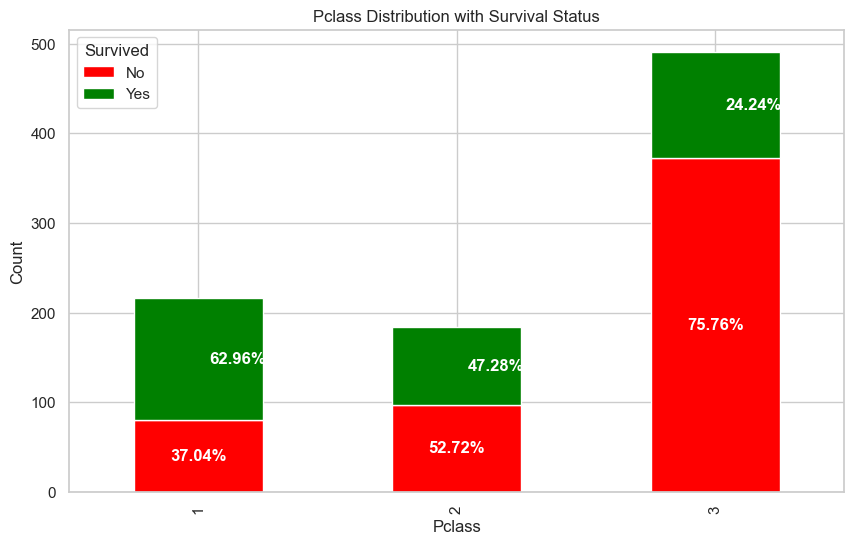

In [179]:
# Create a crosstab of Pclass and Survived
crosstab = pd.crosstab(df['Pclass'], df['Survived'])

# Plot the crosstab as a stacked bar plot
ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Add titles and labels
plt.title('Pclass Distribution with Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Calculate percentages for each Pclass and Survived combination
for pclass in crosstab.index:
    total = crosstab.loc[pclass].sum()
    for survived in crosstab.columns:
        count = crosstab.loc[pclass, survived]
        percentage = count / total * 100
        # Adjust x position for the green part (survived == 1) to be slightly left
        x_position = pclass - 1 + survived * 0.2 - (0.05 if survived == 1 else 0)
        # Annotate the bar with the percentage
        ax.text(
            x=x_position,  # Adjust x position for annotation
            y=crosstab.loc[pclass, :survived].sum() - count / 2,  # Adjust y position for annotation
            s=f'{percentage:.2f}%',
            ha='center',
            va='center',
            color='white',
            fontweight='bold'
        )

# Show the plot
plt.show()

This visualization also reveals the fact that the Class had play a big role in surviving.

In [180]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* First thing that came to my realization is that how deviated the Fare column where on one hand you have people having 0 Fee and on the other spectrum you have giving 512.3 units of money. I think Fare will be a good indicator of the Survived or not because people who gave more Fare were first class people and they got the priority when it comes to saving bots.

* Again, Age is really important because kids got the priority.

* SibSp is the # of siblings / spouses aboard the Titanic, I see values like 8 on the upper end which kind seems really unrealistic. This could be outlier, so further investigation is a must.

* Parch is the # of parents / children aboard the Titanic, again on the upper end, we have 6 which can be justified, but we will investigate this further too.


# Visualisation of number features

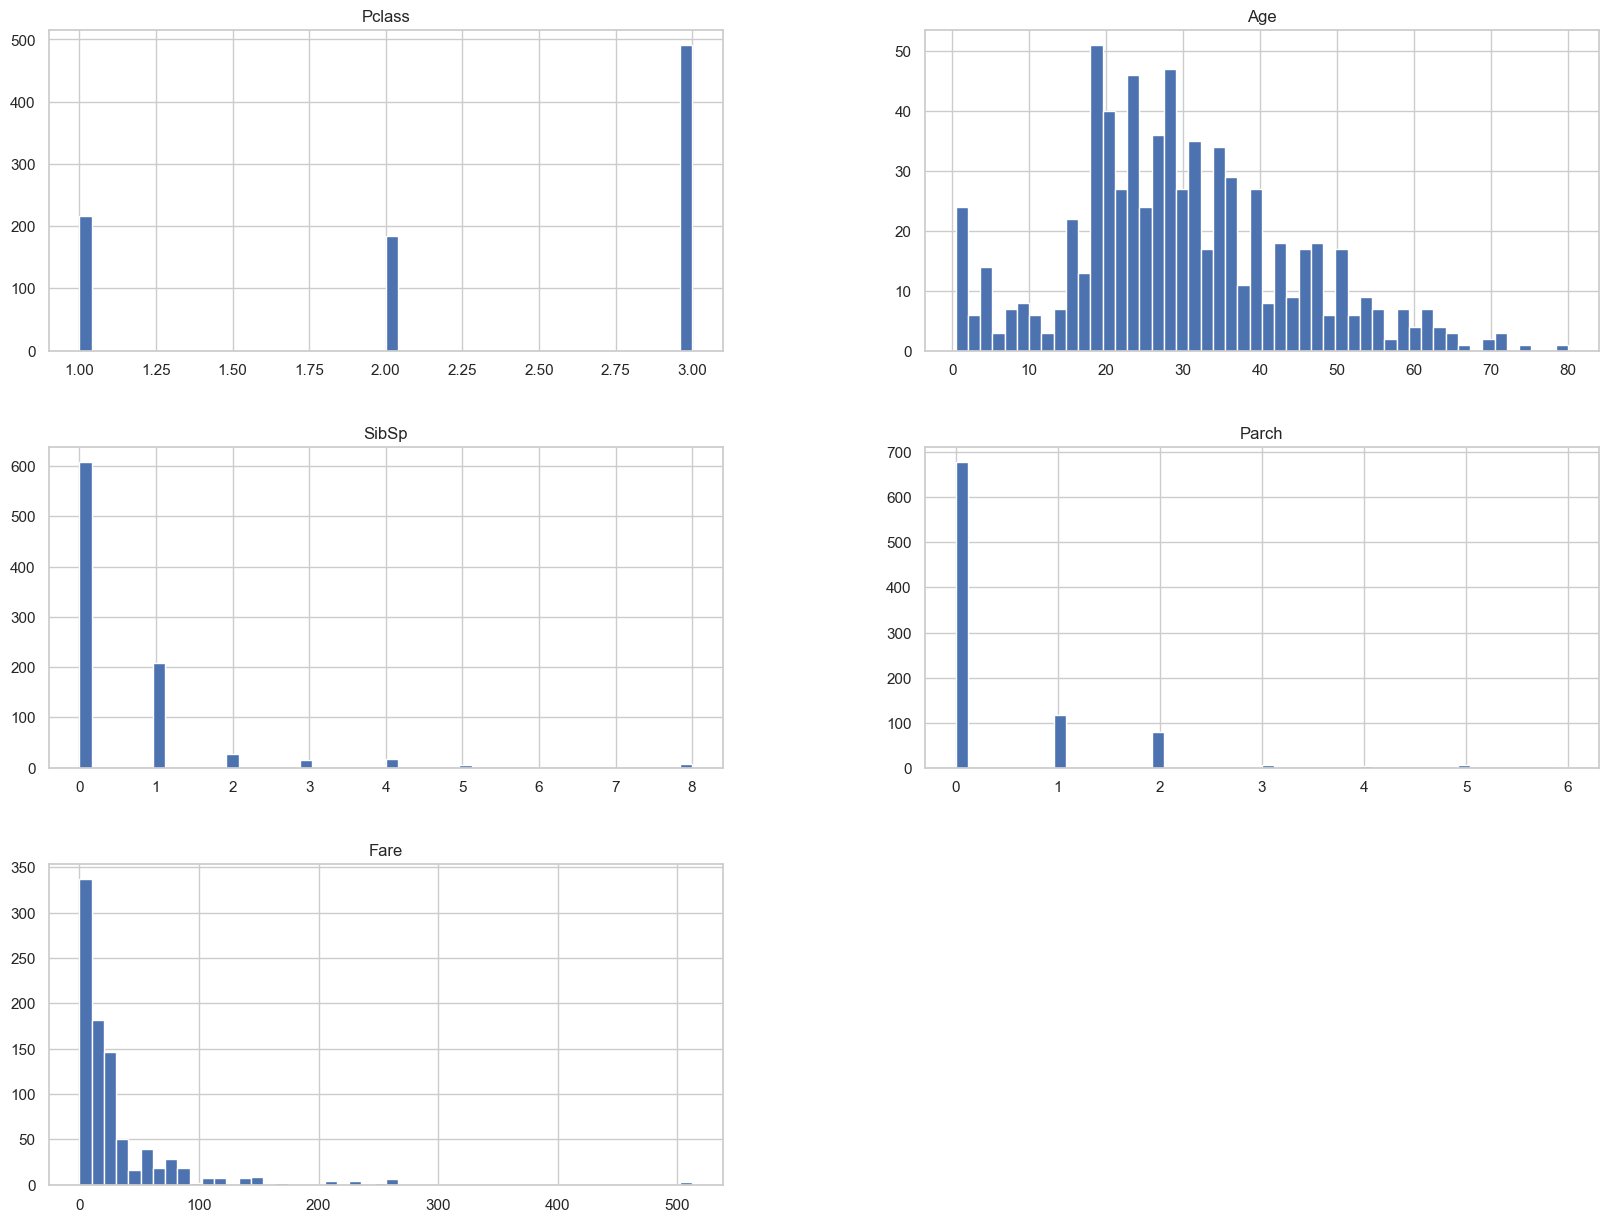

In [181]:
df[["Pclass", "Age", "SibSp", "Parch", "Fare"]].hist(bins=50, figsize=(20,15))
plt.show()

We have pointed out the max Fare price 512 units of money and it seems it is an outlier on the graph but we will run a test and see.

## Look for Correlations

In [182]:
corr_matrix = df.corr()

In [183]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

<Axes: >

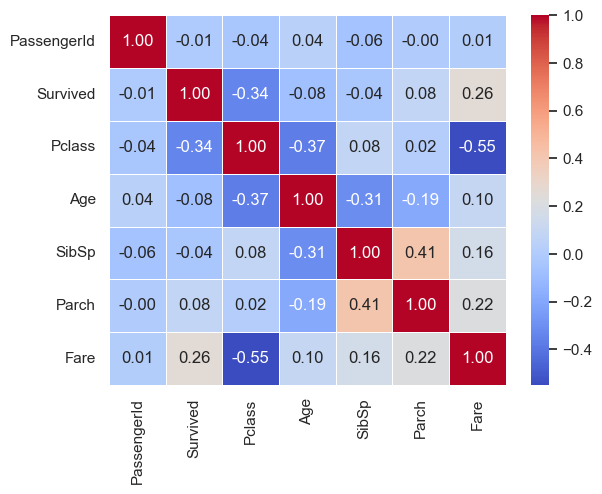

In [184]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

We see that "Survived" is correlated with Fare positively meaning that it is likely that a person that has paid higher fees will survive and negative correlation with Pclass again if your class is first class, you are likely to be survived, same idea as Fare actually. Other variables don't have strong correlation with Survived.

# Feature Engineering

In [185]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [187]:
# let's now make all these changes in a function

def preprocess_data(df):

    df = df.copy()

    # Title Extraction
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Family Size
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    # IsAlone
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    # Mean Imputation
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    # Age Binning
    df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Adult', 'Senior', 'Elder'])
    
    # Fare Imputation
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

    # Fare Binning
    df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
    
    # Embarked
    df['Embarked'] = df['Embarked'].fillna('S') # Most common value
    
    # Interaction Features
    df['Pclass_Fare'] = df['Pclass'] * df['Fare']
    
    # Drop columns that won't be used
    df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    
    return df

In [188]:
df = preprocess_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    object  
 9   Title        891 non-null    object  
 10  FamilySize   891 non-null    int64   
 11  IsAlone      891 non-null    int32   
 12  AgeBin       891 non-null    category
 13  FareBin      891 non-null    category
 14  Pclass_Fare  891 non-null    float64 
dtypes: category(2), float64(3), int32(1), int64(6), object(3)
memory usage: 89.3+ KB


In [189]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,AgeBin,FareBin,Pclass_Fare
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,Adult,Low,21.7500
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,Senior,Very High,71.2833


# Prepare the Data for Ml Model and then Train the model

In [190]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', OneHotEncoder(drop='if_binary'), ['Sex']),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['FareBin', 'AgeBin', 'Title', 'Embarked'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define the full pipeline with preprocessing and model training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the data into training and testing sets
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display the transformed feature names
print(pipeline.named_steps['preprocessor'].get_feature_names_out())

Accuracy: 0.8379888268156425
['binary__Sex_male' 'onehot__FareBin_High' 'onehot__FareBin_Low'
 'onehot__FareBin_Medium' 'onehot__FareBin_Very High'
 'onehot__AgeBin_Adult' 'onehot__AgeBin_Child' 'onehot__AgeBin_Elder'
 'onehot__AgeBin_Senior' 'onehot__AgeBin_Teenager' 'onehot__Title_Col'
 'onehot__Title_Don' 'onehot__Title_Dr' 'onehot__Title_Jonkheer'
 'onehot__Title_Lady' 'onehot__Title_Major' 'onehot__Title_Master'
 'onehot__Title_Miss' 'onehot__Title_Mlle' 'onehot__Title_Mr'
 'onehot__Title_Mrs' 'onehot__Title_Ms' 'onehot__Title_Rev'
 'onehot__Title_Sir' 'onehot__Embarked_C' 'onehot__Embarked_Q'
 'onehot__Embarked_S' 'remainder__Pclass' 'remainder__Age'
 'remainder__SibSp' 'remainder__Parch' 'remainder__Fare'
 'remainder__FamilySize' 'remainder__IsAlone' 'remainder__Pclass_Fare']


c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [191]:
# let's look at the first few rows of the transformed training data
transformed_X_train = pd.DataFrame(pipeline.named_steps['preprocessor'].transform(X_train), columns=pipeline.named_steps['preprocessor'].get_feature_names_out())
transformed_X_train.head()

,binary__Sex_male,onehot__FareBin_High,onehot__FareBin_Low,onehot__FareBin_Medium,onehot__FareBin_Very High,onehot__AgeBin_Adult,onehot__AgeBin_Child,onehot__AgeBin_Elder,onehot__AgeBin_Senior,onehot__AgeBin_Teenager,...,onehot__Embarked_Q,onehot__Embarked_S,remainder__Pclass,remainder__Age,remainder__SibSp,remainder__Parch,remainder__Fare,remainder__FamilySize,remainder__IsAlone,remainder__Pclass_Fare
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,29.699118,0.0,0.0,56.4958,1.0,1.0,169.4874
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,29.699118,0.0,0.0,0.0000,1.0,1.0,0.0000
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,29.699118,0.0,0.0,221.7792,1.0,1.0,221.7792
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,3.0,18.000000,0.0,1.0,9.3500,2.0,0.0,28.0500
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2.0,31.000000,1.0,1.0,26.2500,3.0,0.0,52.5000


After encoding the categorical variables, now we have 35 columns for the model and Our accuracy is 84% meaning that out of 100 guess, our model guess corect 84 times.

# Let's try it with coross valution to see if it any makes difference in our accuracy score

In [192]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores and average accuracy
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation accuracy: {cv_scores.mean()}')

# Display the transformed feature names
pipeline.fit(X, y)  # Fit the pipeline to get feature names
print(pipeline.named_steps['preprocessor'].get_feature_names_out())

c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross-validation scores: [0.82122905 0.80337079 0.80337079 0.81460674 0.84831461]
Average cross-validation accuracy: 0.8181783943255289
['binary__Sex_male' 'onehot__FareBin_High' 'onehot__FareBin_Low'
 'onehot__FareBin_Medium' 'onehot__FareBin_Very High'
 'onehot__AgeBin_Adult' 'onehot__AgeBin_Child' 'onehot__AgeBin_Elder'
 'onehot__AgeBin_Senior' 'onehot__AgeBin_Teenager' 'onehot__Title_Capt'
 'onehot__Title_Col' 'onehot__Title_Countess' 'onehot__Title_Don'
 'onehot__Title_Dr' 'onehot__Title_Jonkheer' 'onehot__Title_Lady'
 'onehot__Title_Major' 'onehot__Title_Master' 'onehot__Title_Miss'
 'onehot__Title_Mlle' 'onehot__Title_Mme' 'onehot__Title_Mr'
 'onehot__Title_Mrs' 'onehot__Title_Ms' 'onehot__Title_Rev'
 'onehot__Title_Sir' 'onehot__Embarked_C' 'onehot__Embarked_Q'
 'onehot__Embarked_S' 'remainder__Pclass' 'remainder__Age'
 'remainder__SibSp' 'remainder__Parch' 'remainder__Fare'
 'remainder__FamilySize' 'remainder__IsAlone' 'remainder__Pclass_Fare']


c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

* Cross-validation scores: [0.82122905 0.80337079 0.80337079 0.81460674 0.84831461]
* Average cross-validation accuracy: 0.8181783943255289

Seems like didn't make any difference.

# Fine-Tune Your Model

In [193]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter grid
param_grid = {
    'classifier__C': uniform(loc=0, scale=4),  # Regularization strength
    'classifier__penalty': ['l1', 'l2']  # Regularization type
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Display the results
print(f'Best parameters: {best_params}')
print(f'Test set accuracy: {test_accuracy}')

c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best parameters: {'classifier__C': 0.23233444867279784, 'classifier__penalty': 'l2'}
Test set accuracy: 0.8268156424581006


c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\sekan\AppData\Local\Programs\Python\Python310\lib\site-package

* Best parameters: {'classifier__C': 0.23233444867279784, 'classifier__penalty': 'l2'}
* Test set accuracy: 0.8268156424581006

So, not much of a performance increases however this could be because of simplicity of the model and the dataset we have. In this case, maybe we could focus on improving the dataset.

# Top 5 important features in our Logistic regression model

In [194]:
# Get the feature names
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get the coefficients from the logistic regression model
coefficients = pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
print("Top 5 most important features:")
print(feature_importances.head(10))

top_features = feature_importances.head(10)

Top 5 most important features:
                      Feature  Importance
22           onehot__Title_Mr    1.437267
18       onehot__Title_Master    1.333195
23          onehot__Title_Mrs    1.216193
4   onehot__FareBin_Very High    1.033608
6        onehot__AgeBin_Child    0.937228
0            binary__Sex_male    0.893360
32           remainder__SibSp    0.697325
19         onehot__Title_Miss    0.653805
27         onehot__Embarked_C    0.591898
33           remainder__Parch    0.522068


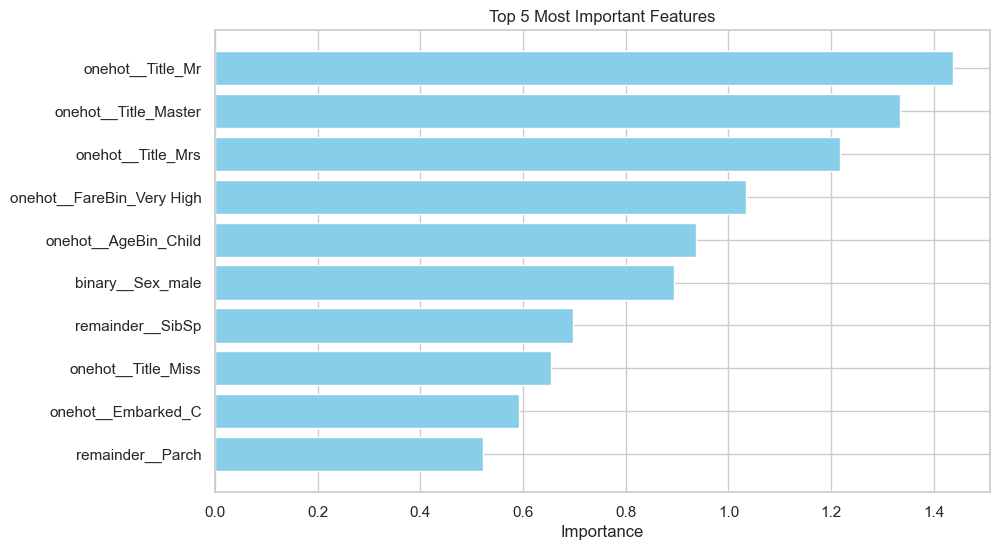

In [195]:
# Plot the top 5 most important features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 5 Most Important Features')
plt.gca().invert_yaxis()
plt.show()

We can see a lot of emphasis on the Sex being an important feature in our model to decide whether the person will die or not. We can especially see this on Mr, Mrs, Sex_male, Miss columns. Also the AgeBin_Child is a good one. Another one is the wealth of the person which we can see this on FareBin_Very High column.

In [196]:
df_test = pd.read_csv("datasets/test.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [197]:
# let's prepare the test data
df_test = preprocess_data(df_test)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Title        418 non-null    object  
 9   FamilySize   418 non-null    int64   
 10  IsAlone      418 non-null    int32   
 11  AgeBin       418 non-null    category
 12  FareBin      418 non-null    category
 13  Pclass_Fare  418 non-null    float64 
dtypes: category(2), float64(3), int32(1), int64(5), object(3)
memory usage: 38.9+ KB


In [198]:
# Make predictions
predictions = best_model.predict(df_test.drop('PassengerId', axis=1))

# Create a DataFrame with 'PassengerId' and 'Survived' columns
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})



,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [200]:
# let's save the submission
submission.to_csv('submission.csv', index=False)

We recieved 78% in submission, so it has performed poorer than training, it seems like we are overfitting but it is not drastic.